# IBM DataScience - Capstone Project - Part 4 - Sven De Smit

## Read datasets

In [1]:
import pandas as pd
import numpy as np
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

### Read cities dataset

In [2]:
df_full_merged = pd.read_csv('be_cities_full_merged.csv')
df_full_merged.head()

,ID,Name,Habitants,Index,Acreage,HabitantsPerSquareKm,ProsperityIndex,Province,Latitude,Longitude,...,Duits,Begin,Einde,geojson_name,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,1,Antwerpen,525935,443.0,204.51,2572,88.2,Antwerpen,51.221110,4.399708,...,Antwerpen,01.01.0001,31.12.9999,Antwerpen,3,Coffee Shop,Clothing Store,Cocktail Bar,Belgian Restaurant,Plaza
1,2,Gent,262219,204.0,156.18,1679,102.3,Oost-Vlaanderen,51.053829,3.725012,...,Gent,01.01.0001,31.12.9999,Gent,3,Coffee Shop,Plaza,Breakfast Spot,Bar,Bistro
2,3,Charleroi,202267,370.0,102.08,1982,73.0,Henegouwen,50.412033,4.443624,...,-,01.01.0001,31.12.9999,Charleroi,3,Italian Restaurant,Restaurant,Brewery,Clothing Store,Bar
3,4,Luik,197327,219.0,69.39,2844,81.4,Luik,50.645138,5.573420,...,Lüttich,01.01.0001,31.12.9999,Liège,3,Restaurant,Italian Restaurant,Bar,Coffee Shop,French Restaurant
4,5,Brussel,181726,140.0,32.61,5573,70.0,Brussel,50.846557,4.351697,...,-,01.01.0001,31.12.9999,Brussel#Bruxelles,3,Bar,Seafood Restaurant,Belgian Restaurant,Plaza,French Restaurant


In [3]:
df_full_merged[(df_full_merged['Name'] == 'Lokeren')]

,ID,Name,Habitants,Index,Acreage,HabitantsPerSquareKm,ProsperityIndex,Province,Latitude,Longitude,...,Duits,Begin,Einde,geojson_name,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
39,43,Lokeren,41690,194.0,67.5,618,102.7,Oost-Vlaanderen,51.104216,3.991111,...,-,01.01.0001,31.12.9999,Lokeren,0,Bakery,Bar,Park,Friterie,Doner Restaurant


### Read venues dataset

In [4]:
df_venues_full_merged = pd.read_csv('be_venues_full_merged.csv')
df_venues_full_merged.head()

,City,Venue,Venue Latitude,Venue Longitude,Category Class,Venue Category,class1,class2,Cluster Labels
0,Antwerpen,Moochie Frozen Yoghurt,51.220036,4.402850,https://ss3.4sqi.net/img/categories_v2/food/fr...,Frozen Yogurt Shop,food,food frozenyogurt_,3
1,Antwerpen,Dogma Cocktails,51.221146,4.402854,https://ss3.4sqi.net/img/categories_v2/nightli...,Cocktail Bar,nightlife,nightlife cocktails_,3
2,Antwerpen,Absinthbar,51.219912,4.400709,https://ss3.4sqi.net/img/categories_v2/nightli...,Cocktail Bar,nightlife,nightlife cocktails_,3
3,Antwerpen,Pitten en Bonen,51.217657,4.402712,https://ss3.4sqi.net/img/categories_v2/food/ju...,Juice Bar,food,food juicebar_,3
4,Antwerpen,Kartini Indonesisch Restaurant,51.219270,4.400557,https://ss3.4sqi.net/img/categories_v2/food/in...,Indonesian Restaurant,food,food indonesian_,3


## Show map with Number of habitants for the Belgian cities

Re-scale number of habitants column for better display on the choropleth map

In [5]:
df_full_merged['Khab'] = df_full_merged['Habitants']/1000
df_full_merged['Khab'] = np.where(df_full_merged['Khab'] > 300, 300, df_full_merged['Khab'])
df_full_merged.head()

,ID,Name,Habitants,Index,Acreage,HabitantsPerSquareKm,ProsperityIndex,Province,Latitude,Longitude,...,Begin,Einde,geojson_name,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Khab
0,1,Antwerpen,525935,443.0,204.51,2572,88.2,Antwerpen,51.221110,4.399708,...,01.01.0001,31.12.9999,Antwerpen,3,Coffee Shop,Clothing Store,Cocktail Bar,Belgian Restaurant,Plaza,300.000
1,2,Gent,262219,204.0,156.18,1679,102.3,Oost-Vlaanderen,51.053829,3.725012,...,01.01.0001,31.12.9999,Gent,3,Coffee Shop,Plaza,Breakfast Spot,Bar,Bistro,262.219
2,3,Charleroi,202267,370.0,102.08,1982,73.0,Henegouwen,50.412033,4.443624,...,01.01.0001,31.12.9999,Charleroi,3,Italian Restaurant,Restaurant,Brewery,Clothing Store,Bar,202.267
3,4,Luik,197327,219.0,69.39,2844,81.4,Luik,50.645138,5.573420,...,01.01.0001,31.12.9999,Liège,3,Restaurant,Italian Restaurant,Bar,Coffee Shop,French Restaurant,197.327
4,5,Brussel,181726,140.0,32.61,5573,70.0,Brussel,50.846557,4.351697,...,01.01.0001,31.12.9999,Brussel#Bruxelles,3,Bar,Seafood Restaurant,Belgian Restaurant,Plaza,French Restaurant,181.726


The following choropleth shows the habitants per city on a map of Belgium. The line on the map represents the language border between the north and the south (in reality this is not a straight line, but instead follows the city borders!). 
Remark: the cities filled with a white colour on the map are cities for which data is missing in the cities dataset


In [6]:
be_geo = r'municipalities-belgium.geojson' # geojson file
latitude = 50.85045 - 0.40
longitude = 4.34878
# create a plain world map
#world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')
map_be = folium.Map(location=[latitude, longitude], zoom_start=8)

# BuGn, BuPu, GnBu, OrRd, PuBu, PuBuGn, PuRd, RdPu, YlGn, YlGnBu, YlOrBr, and YlOrRd
# nan_fill_color and nan_fill_opacity
map_be.choropleth(
    geo_data=be_geo,
    data=df_full_merged,
    columns=['geojson_name', 'Khab'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.3, 
    line_opacity=0.2,
    nan_fill_opacity=0.3,
    nan_fill_color='white',
    threshold_scale=[0,5, 10, 25, 100, 301],
    legend_name='Habitants (x1000)')
folium.PolyLine([[50.75,2.5],[50.8,5.9]], color="red", weight=2.5, opacity=1).add_to(map_be)
map_be

C:\Tools\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


This map shows that in general the cities in the north have higher populations than the cities in the south.

## Show map showing to which cluster the Belgian cities belong 

Give the clusters a meaningfull name

In [7]:
cluster_names = ['Pubs Places - typical dutch','Quite & local tourism','Quite place','Big & Medium-size Cities','Food & Shops - typical french']

The following Folium map shows the cities with their associated cluster types on the map of Belgium. We have assigned a meaningful label to each cluster that aims at giving a general decription of the types of cities in that cluster. Those labels and associated colors can be found in the map’s legend.

In [8]:
latitude = 50.85045 - 0.40
longitude = 4.34878

kclusters = 5

# create map
map_clusters = folium.Map(location=[latitude + 0.05, longitude], zoom_start=8)


# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
#print(rainbow)
rainbow = ['blue','red','purple','green','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_full_merged['Latitude'], df_full_merged['Longitude'], df_full_merged['Name'], df_full_merged['Cluster Labels']):
    #label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    label = folium.Popup(str(poi) + '\n[' + cluster_names[cluster] + ']', parse_html=True)
    cluster = int(cluster)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
folium.PolyLine([[50.75,2.5],[50.8,5.9]], color="red", weight=2.5, opacity=1).add_to(map_clusters)
map_clusters

Those are the key observations that we can make based on this visualization:
-	The big and medium sized cities are pretty similar between the north and the south w.r.t. popular venues (purple)
-	For the smaller cities there is a dissimilarity between the north (orange) and the south (green).
-	There are a small number of “special” cities (blue and red), that we will keep out of the discussions


## Cluster inspection - what are the most popular venues types for each cluster?

### Create the datasets for the visualizations 

We know now where the different kinds of cities are positioned on the map, but what we don’t know yet is what makes those cities different w.r.t. popular venue types. Below you can find the what the most popular venue categories are for each cluster (city type). These pie charts show - for the 9 level-1 venue categories – what the most popular categories are for a given cluster. The level-1 venue categories can be found in de legends.

In [9]:
# translate cluster label column values from flota tot int
df_venues_full_merged['Cluster Labels'] = df_venues_full_merged['Cluster Labels'].astype('int32')
print(df_venues_full_merged.shape)
df_venues_full_merged.head()

(16812, 9)


,City,Venue,Venue Latitude,Venue Longitude,Category Class,Venue Category,class1,class2,Cluster Labels
0,Antwerpen,Moochie Frozen Yoghurt,51.220036,4.402850,https://ss3.4sqi.net/img/categories_v2/food/fr...,Frozen Yogurt Shop,food,food frozenyogurt_,3
1,Antwerpen,Dogma Cocktails,51.221146,4.402854,https://ss3.4sqi.net/img/categories_v2/nightli...,Cocktail Bar,nightlife,nightlife cocktails_,3
2,Antwerpen,Absinthbar,51.219912,4.400709,https://ss3.4sqi.net/img/categories_v2/nightli...,Cocktail Bar,nightlife,nightlife cocktails_,3
3,Antwerpen,Pitten en Bonen,51.217657,4.402712,https://ss3.4sqi.net/img/categories_v2/food/ju...,Juice Bar,food,food juicebar_,3
4,Antwerpen,Kartini Indonesisch Restaurant,51.219270,4.400557,https://ss3.4sqi.net/img/categories_v2/food/in...,Indonesian Restaurant,food,food indonesian_,3


We take all the venues of all the cities belonging to a given cluster, calculate the total number of occurrences for each of the level-1 venue categories, and showed the percentage for each category on the pie chart. 

In [10]:
# make dataframe of venues per cluster
df_venues_by_cluster = []
cluster_vals = np.arange(5)
for cl_val in cluster_vals:
    df_venues_by_cluster.append(df_venues_full_merged.loc[df_venues_full_merged['Cluster Labels'] == cl_val])

In [11]:
for cl_val in cluster_vals:
    print('Number of entries for cluster {}: {}'.format(cl_val,len(df_venues_by_cluster[cl_val])))

Number of entries for cluster 0: 5569
Number of entries for cluster 1: 224
Number of entries for cluster 2: 74
Number of entries for cluster 3: 9249
Number of entries for cluster 4: 1696


In [12]:
# create a dataframe with the level-1 category counters per cluster
df_venues_cat = []
for cl_val in cluster_vals:

    df_venues_cat.append(df_venues_by_cluster[cl_val].groupby('class1', axis=0).count())
    #print('cluster: ',cl_val)
    #print(df_venues_cat[cl_val]['City'].head(10))

In [13]:
# create a series with the level-1 category counters per cluster
ser_venues_cat = []
for df_clust_cat in df_venues_cat:
    ser_venues_cat.append(df_clust_cat['City'])


In [14]:
cluster_vals

array([0, 1, 2, 3, 4])

In [15]:
# Create a complete set with all level-1 venue categories for all clusters
label_set = set({})
for cl_val in cluster_vals:
    label_set = label_set.union(df_venues_cat[cl_val].index)
print(label_set)
labels = list(label_set)
labels = sorted(labels)
print(labels)

{'nightlife', 'education', 'building', 'event', 'shops', 'travel', 'parks_outdoors', 'food', 'arts_entertainment'}
['arts_entertainment', 'building', 'education', 'event', 'food', 'nightlife', 'parks_outdoors', 'shops', 'travel']


In [16]:
# Do all clusters have venues of all categories? Answer: NO
# Add missing categories for a given cluster to the series with a count value of 0 
for ser_cat in ser_venues_cat:
    for label in label_set:
        if not (label in ser_cat.index):
            print(label)
            ser_cat[label] = 0
    ser_cat.sort_index(inplace=True)
        

event
education
building
event
event


In [17]:
ser_venues_cat

[class1
 arts_entertainment     273
 building               174
 education               54
 event                    4
 food                  1943
 nightlife              929
 parks_outdoors         452
 shops                 1463
 travel                 277
 Name: City, dtype: int64, class1
 arts_entertainment    13
 building               5
 education              4
 event                  0
 food                  45
 nightlife             13
 parks_outdoors        21
 shops                 69
 travel                54
 Name: City, dtype: int64, class1
 arts_entertainment     4
 building               0
 education              0
 event                  0
 food                  37
 nightlife              3
 parks_outdoors        11
 shops                 11
 travel                 8
 Name: City, dtype: int64, class1
 arts_entertainment     542
 building               308
 education               54
 event                    8
 food                  3967
 nightlife              849
 p

### Show pie charts with popular venue types for each cluster

['arts_entertainment', 'building', 'education', 'event', 'food', 'nightlife', 'parks_outdoors', 'shops', 'travel']


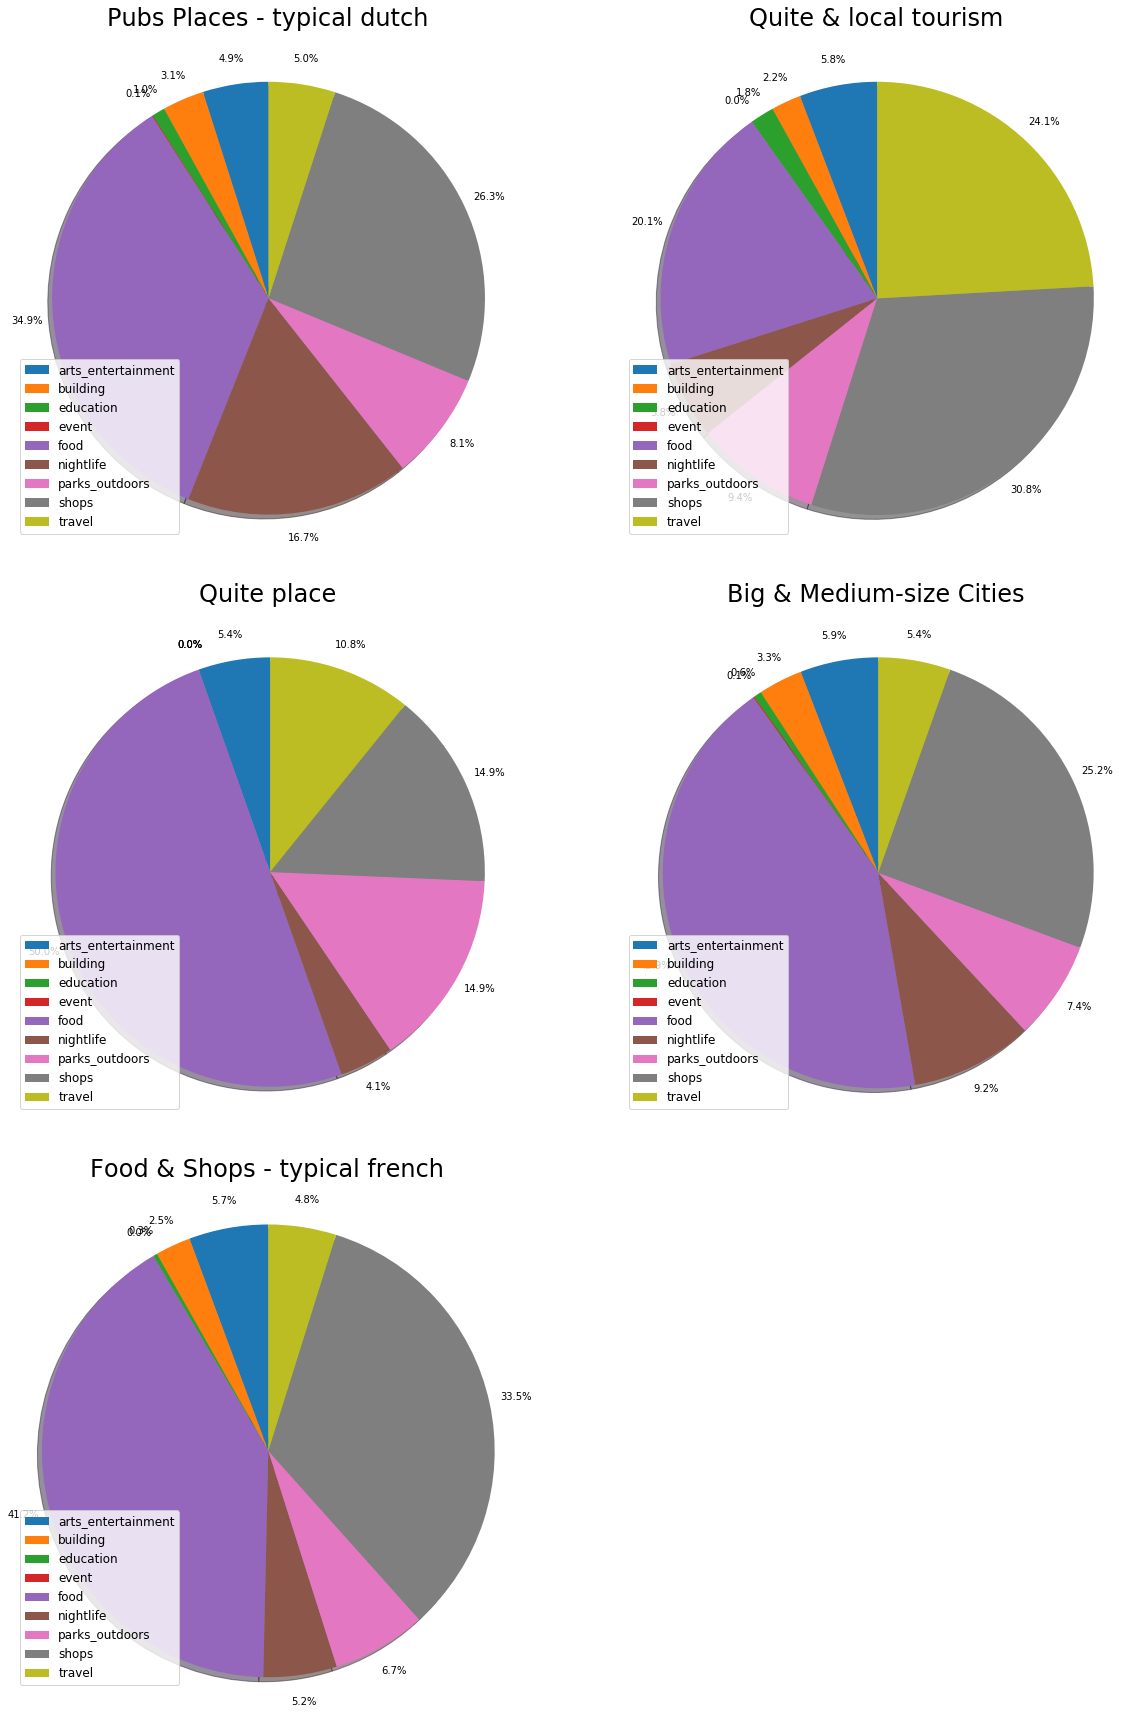

In [18]:
import matplotlib.pyplot as plt


explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
#labels = list(label_set)
#labels = labels.sort()
print(labels)

fig, axs = plt.subplots(3, 2,figsize=(20,30))
for cl_val in cluster_vals:
    #print(int(cl_val/2),cl_val%2)
    #print(ser_venues_cat[cl_val])
    axs[int(cl_val/2),cl_val%2].pie(ser_venues_cat[cl_val], labels=None, autopct='%1.1f%%',shadow=True, startangle=90, pctdistance=1.12)
    axs[int(cl_val/2),cl_val%2].set_title(cluster_names[cl_val]+'\n', fontsize=24)
    axs[int(cl_val/2),cl_val%2].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    axs[int(cl_val/2),cl_val%2].legend(labels, loc="lower left",prop={'size': 12})

axs[2,1].set_frame_on(False)
#axs[2,1].get_xaxis().tick_bottom()
axs[2,1].axes.get_yaxis().set_visible(False)
axs[2,1].axes.get_xaxis().set_visible(False)

plt.show()


### Get a deeper insight in what venue categories are popular for each cluster

The above already gives us a basic idea about what the most popular venues are for each cluster, but it only took into account the level-1 venue category. A deeper insight can be obtained by using all venue category levels. There are so many of them, which makes it impossible to visualize using a pie chart. Below you can find the top-10 most popular venue categories for each cluster. 

In [19]:
# Pubs Places - typical dutch
df_cat_per_cluster = df_venues_by_cluster[0].groupby('Venue Category').count()
print('Total:',len(df_cat_per_cluster))
df_cat_per_cluster[['City']].sort_values(by='City',ascending=False).head(10)

Total: 343


,City
Venue Category,
Bar,722
Friterie,270
Bakery,237
Supermarket,209
Bus Stop,145
Restaurant,120
Sandwich Place,113
Plaza,103
Pub,97


In [20]:
# Quite & local tourism
df_cat_per_cluster = df_venues_by_cluster[1].groupby('Venue Category').count()
print('Total:',len(df_cat_per_cluster))
df_cat_per_cluster[['City']].sort_values(by='City',ascending=False).head(10)

Total: 90


,City
Venue Category,
Bus Stop,48
Pharmacy,11
Friterie,11
Athletics & Sports,10
Supermarket,8
Bakery,6
Bar,6
Park,6
Sports Bar,4


In [21]:
# Quite place
df_cat_per_cluster = df_venues_by_cluster[2].groupby('Venue Category').count()
print('Total:',len(df_cat_per_cluster))
df_cat_per_cluster[['City']].sort_values(by='City',ascending=False).head(10)

Total: 37


,City
Venue Category,
Bakery,18
Athletics & Sports,3
Soccer Field,3
Pharmacy,3
Bookstore,3
Friterie,3
Italian Restaurant,2
Playground,2
Road,2


In [22]:
# Big & Medium-size Cities
df_cat_per_cluster = df_venues_by_cluster[3].groupby('Venue Category').count()
print('Total:',len(df_cat_per_cluster))
df_cat_per_cluster[['City']].sort_values(by='City',ascending=False).head(10)

Total: 405


,City
Venue Category,
Bar,470
Supermarket,332
Italian Restaurant,318
Bakery,303
Restaurant,302
Friterie,272
French Restaurant,235
Sandwich Place,232
Plaza,178


In [23]:
# Food & Shops - typical french
df_cat_per_cluster = df_venues_by_cluster[4].groupby('Venue Category').count()
print('Total:',len(df_cat_per_cluster))
df_cat_per_cluster[['City']].sort_values(by='City',ascending=False).head(10)

Total: 216


,City
Venue Category,
Supermarket,272
Italian Restaurant,68
French Restaurant,68
Friterie,64
Restaurant,62
Bakery,57
Bar,56
Pizza Place,51
Sandwich Place,35


In [24]:
for cl_val in cluster_vals:
    print('Number of entries for cluster {}: {}'.format(cl_val,len(df_venues_by_cluster[cl_val])))

Number of entries for cluster 0: 5569
Number of entries for cluster 1: 224
Number of entries for cluster 2: 74
Number of entries for cluster 3: 9249
Number of entries for cluster 4: 1696
